In [ ]:
# Mount "My Drive" into /content/drive
from google.colab import drive

google_drive_dir = "bml-notebooks/Final_project/ThuMucCuaPha"  # @param
#bml-notebooks/
drive.mount('/content/drive')

mount_point = "/content/drive/My Drive/{}".format(google_drive_dir)

# Change the root directory to your mount_point
% cd '$mount_point'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1uHceact8nZzLehIO7J8WmUhJnJWKOf8w/Final_project/ThuMucCuaPha


# <span style="color: royalblue;">Load Data</span>
Load the image data with labels.

In [ ]:
import numpy as np
from src.loadData import loadFer2013
from keras.utils import to_categorical


In [ ]:
X_train,X_val,X_test,y_train,y_val,y_test = loadFer2013('fer2013/icml_face_data.csv')

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

/content/drive/.shortcut-targets-by-id/1uHceact8nZzLehIO7J8WmUhJnJWKOf8w/Final_project/src/loadData.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emotion'][data['emotion']>1]-=1


In [ ]:
y_train_onehot.shape, y_val_onehot.shape, y_test_onehot.shape

((28709, 6), (3589, 6), (3589, 6))

In [ ]:
X_train.shape, y_train.shape

((28709, 48, 48), (28709,))

In [ ]:
emotions = {0: 'Angry', 1:'Fear', 2: 'Happy', 3: 'Sad', 4: 'Surprise', 5: 'Neutral'}

In [ ]:
class_names = list(emotions.values())
class_names

['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

#Preprocessing

In [ ]:
def preprocessX(X):
    X = np.expand_dims(X,axis=-1)
    return X/255

X_processed_train = preprocessX(X_train)
X_processed_val = preprocessX(X_val)
X_processed_test = preprocessX(X_test)
X_processed_train.shape,X_processed_val.shape,X_processed_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1), (3589, 48, 48, 1))

# Extract features

In [ ]:
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam,SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
epochs = 20
lr = 0.01
decay = lr/epochs
sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!ls

'Bản sao của 1-facial-expression-eda-cnn.ipynb'   prepareTestImages.ipynb
'Bản sao của TN13_CNN.ipynb'			  src
 data_imgs					  test_imgs.zip
 fer2013					  train-Pha.ipynb
 keras_model					  train-svm.ipynb


In [ ]:
checkpoint_filepath = 'keras_model/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)              

In [ ]:

history = model.fit(X_processed_train,y_train_onehot,
                    validation_data=(X_processed_val, y_val_onehot),
                    epochs=epochs,
                    batch_size=128,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
225/225 [==============================] - 3s 11ms/step - loss: 1.7621 - accuracy: 0.2478 - val_loss: 1.7234 - val_accuracy: 0.2580
Epoch 2/20
225/225 [==============================] - 2s 10ms/step - loss: 1.6982 - accuracy: 0.2833 - val_loss: 1.6187 - val_accuracy: 0.3461
Epoch 3/20
225/225 [==============================] - 2s 10ms/step - loss: 1.5915 - accuracy: 0.3627 - val_loss: 1.5453 - val_accuracy: 0.3870
Epoch 4/20
225/225 [==============================] - 2s 9ms/step - loss: 1.5143 - accuracy: 0.4042 - val_loss: 1.4891 - val_accuracy: 0.4140
Epoch 5/20
225/225 [==============================] - 2s 10ms/step - loss: 1.4712 - accuracy: 0.4182 - val_loss: 1.4429 - val_accuracy: 0.4302
Epoch 6/20
225/225 [==============================] - 2s 9ms/step - loss: 1.4145 - accuracy: 0.4435 - val_loss: 1.4146 - val_accuracy: 0.4419
Epoch 7/20
225/225 [==============================] - 2s 9ms/step - loss: 1.3725 - accuracy: 0.4585 - val_loss: 1.3901 - val_accuracy: 0.4480
Ep

In [ ]:
model.evaluate(X_processed_test,y_test_onehot)

113/113 [==============================] - 0s 3ms/step - loss: 1.3072 - accuracy: 0.5249


[1.30718195438385, 0.5249373316764832]

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(X_processed_test,y_test_onehot)

113/113 [==============================] - 0s 3ms/step - loss: 1.3072 - accuracy: 0.5249


[1.30718195438385, 0.5249373316764832]

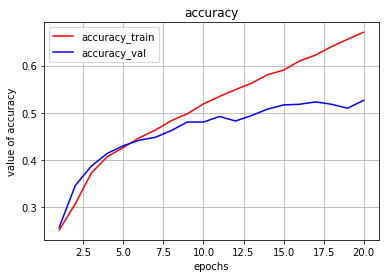

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'r', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

#Evaluation

In [ ]:
# Quantitative evaluation of the model quality on the test set
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Predicting people's names on the test set")
t0 = time.time()
y_pred = model.predict(X_processed_test)
print("done in %0.3fs" % (time.time() - t0))

print(classification_report(y_test_onehot, y_pred, target_names=class_names))
# print(confusion_matrix(y_test, y_pred, labels=range(len(class_names))))

Predicting people's names on the test set
done in 2.683s


ValueError: ignored

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred,average='micro'))


0.4834215658957927
0.4834215658957927


In [ ]:
import pickle
pickle.dump(svm, open('saved_model/eignface_svmC1.pkl', 'wb'))